In [7]:
#https://mohammadimranhasan.com/linear-regression-of-time-series-data-with-pandas-library-in-python/
import scipy.stats as sp
import sklearn
#Plot the volume to see the trend
from matplotlib import pyplot as plt
import numpy as np
import math 
import pandas as pd
df = pd.read_excel(r'C:\Users\xwang\OneDrive - CCMI\Desktop\Python\New folder\DC.xlsx', sheet_name = 'New Method')
print (df)

         Time           IHS      Fred Cal         Diff  Margin   Result
0  2016-01-01  26680.682726  29531.270449  2850.587724      NaN     NaN
1  2016-04-01  28538.725113  31929.485889  3390.760776      NaN     NaN
2  2016-07-01  27839.075848  31324.927560  3485.851713      NaN     NaN
3  2016-10-01  26016.633796  29523.278751  3506.644955      NaN     NaN
4  2017-01-01  29184.024807  33259.732864  4075.708057      NaN     NaN
5  2017-04-01  25227.757996  29199.297649  3971.539653      NaN     NaN
6  2017-07-01  26598.792430  31187.701489  4588.909059      NaN     NaN
7  2017-10-01  29065.415412  34212.839570  5147.424158      NaN     NaN
8  2018-01-01  29019.732538  34329.952834  5310.220296      NaN     NaN
9  2018-04-01  25317.014600  30614.124886  5297.110287      NaN     NaN
10 2018-07-01  24903.694801  30407.571146  5503.876346      NaN     NaN
11 2018-10-01  27356.521517  33746.262440  6389.740923      NaN     NaN
12 2019-01-01  28401.480838  35126.998117  6725.517280      NaN 

In [8]:
x = df['Time']
print(type(x))
y = df['Diff']

<class 'pandas.core.series.Series'>


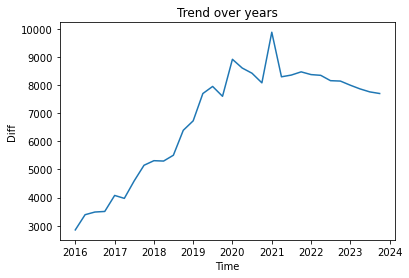

In [9]:
plt.plot(x,y)
plt.xlabel("Time")
plt.ylabel("Diff")
plt.title('Trend over years')
plt.show()

        Time           IHS      Fred Cal         Diff  Margin   Result
0 2016-01-01  26680.682726  29531.270449  2850.587724      NaN     NaN
1 2016-04-01  28538.725113  31929.485889  3390.760776      NaN     NaN
2 2016-07-01  27839.075848  31324.927560  3485.851713      NaN     NaN
3 2016-10-01  26016.633796  29523.278751  3506.644955      NaN     NaN
4 2017-01-01  29184.024807  33259.732864  4075.708057      NaN     NaN


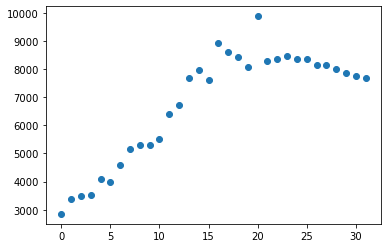

In [10]:
#scatter plot-each data point
print (df.head())
df['Diff'].dropna().plot(marker='o', ls='');

In [11]:
#check type of input 
y=np.array(df['Diff'].dropna().values, dtype=float)
y
x=np.array(pd.to_datetime(df['Diff'].dropna()).index.values, dtype=float)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31.])

In [12]:
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
# fit into linear regression model
print(slope)
print(intercept)
#get coefficients for our model

179.5794819535297
3990.95551160588


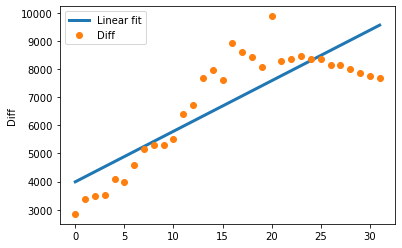

In [13]:
# compare the model with data
f, ax = plt.subplots(1, 1)
yf = (slope*x)+intercept
ax.plot(x, yf,label='Linear fit', lw=3)
df['Diff'].dropna().plot(ax=ax,marker='o', ls='')
plt.ylabel('Diff')
ax.legend();

In [14]:
#check how fit our model is
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

r =  0.8467849980394109 
 p =  1.0058715116838358e-09 
 s =  20.59594608433177


In [15]:
#check accurancy of model
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(y, yf)

0.7170448329046054